<a href="https://colab.research.google.com/github/Sanja2000/Industrial-resource/blob/main/Human_resource.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
from glob import glob

Merging several csv files into one dataframe by using the glob function

In [99]:
data_files = sorted(glob('/content/data*.csv'))
data_files

['/content/data1.csv',
 '/content/data2.csv',
 '/content/data3.csv',
 '/content/data4.csv']

In [100]:
df = pd.concat(pd.read_csv(datafile, encoding=('ISO-8859-1'),low_memory =False).assign(sourcefilename = datafile) for datafile in data_files)

In [101]:
df.head(5)      

,Table Name,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,...,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females,sourcefilename
0,B0118,`08,`000,STATE - RAJASTHAN,`00,`000,`0000,Total,9017944,7594737,...,2307752,1046813,1260939,1825830,749381,1076449,481922,297432,184490,/content/data1.csv
1,B0118,`08,`000,STATE - RAJASTHAN,`01,`000,`0000,"Crop and animal production, hunting and relate...",450766,201572,...,408728,76106,332622,390864,71124,319740,17864,4982,12882,/content/data1.csv
2,B0118,`08,`000,STATE - RAJASTHAN,`01,`011,`0000,Growing of non-perennial crops,12876,10547,...,9562,4051,5511,8147,3295,4852,1415,756,659,/content/data1.csv
3,B0118,`08,`000,STATE - RAJASTHAN,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",12061,9911,...,9085,3883,5202,7777,3161,4616,1308,722,586,/content/data1.csv
4,B0118,`08,`000,STATE - RAJASTHAN,`01,`011,`0112,Growing of rice,79,71,...,13,4,9,11,2,9,2,2,0,/content/data1.csv


DATA CLEANING

Checking for the null values present in the dataset column-wise.

In [102]:
df.isna().sum()

Table Name                             0
State Code                             0
District Code                          0
India/States                           0
Division                               0
Group                                  0
Class                                  0
NIC Name                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers

There are no null values present in any column of the dataset.

De Duplicate

Cheking for the duplicated values

In [103]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3976    False
3977    False
3978    False
3979    False
3980    False
Length: 37008, dtype: bool

There are no duplicate values present in any column of the dataset.

In [ ]:
df.shape

(37008, 27)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37008 entries, 0 to 3980
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Table Name                           37008 non-null  object
 1   State Code                           37008 non-null  object
 2   District Code                        37008 non-null  object
 3   India/States                         37008 non-null  object
 4   Division                             37008 non-null  object
 5   Group                                37008 non-null  object
 6   Class                                37008 non-null  object
 7   NIC Name                             37008 non-null  object
 8   Main Workers - Total -  Persons      37008 non-null  int64 
 9   Main Workers - Total - Males         37008 non-null  int64 
 10  Main Workers - Total - Females       37008 non-null  int64 
 11  Main Workers - Rural -  Persons      37008

Dropping Unwanted Columns

In [107]:
df.drop(['State Code'], axis=1, inplace=True)

In [ ]:
df.drop(['District Code'], axis=1, inplace=True)

In [110]:
df.drop(['Group'], axis=1, inplace=True)

copying the original dataset for further opertions

In [ ]:
dforiginal=df.copy()

Dropping the duplicates in the NIC column

In [ ]:
df.drop_duplicates(subset=['NIC Name'], inplace=True)

In [ ]:
df['NIC Name'].shape

(585,)

Implementing the natural language processing here to get the clear view

1. Remove Punctuation

In [ ]:
df['NIC Name_processed'] = df['NIC Name'].str.replace("[^a-zA-Z0-9]", " ")

<ipython-input-21-b105d8043534>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['NIC Name_processed'] = df['NIC Name'].str.replace("[^a-zA-Z0-9]", " ")


In [ ]:
df = df[['NIC Name_processed']]

In [ ]:
df['NIC Name_processed'] 

0                                                  Total
1      Crop and animal production  hunting and relate...
2                         Growing of non perennial crops
3      Growing of cereals  except rice   leguminous c...
4                                        Growing of rice
                             ...                        
741    Activities of extraterritorial organizations a...
744                                                Blank
746            Incomplete description  Wrongly Classifed
7                                     Growing of tobacco
10                                     Growing of grapes
Name: NIC Name_processed, Length: 585, dtype: object

Replacing the null values in order to replace the short words

In [ ]:
df['NIC Name_processed'] = df['NIC Name_processed'].fillna("")

<ipython-input-24-cf3f7ce1e0e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NIC Name_processed'] = df['NIC Name_processed'].fillna("")


2.Replacing the short words

In [ ]:
df['NIC Name_processed'] = df['NIC Name_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

<ipython-input-25-b1b7c3589254>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NIC Name_processed'] = df['NIC Name_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))


In [ ]:
df['NIC Name_processed']

0                                                  Total
1      Crop and animal production hunting and related...
2                            Growing non perennial crops
3      Growing cereals except rice leguminous crops a...
4                                           Growing rice
                             ...                        
741    Activities extraterritorial organizations and ...
744                                                Blank
746             Incomplete description Wrongly Classifed
7                                        Growing tobacco
10                                        Growing grapes
Name: NIC Name_processed, Length: 585, dtype: object

3.Making text lowercase

In [ ]:
df['NIC Name_processed'] = [rev.lower() for rev in df['NIC Name_processed']]

<ipython-input-27-d366961e676f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NIC Name_processed'] = [rev.lower() for rev in df['NIC Name_processed']]


In [ ]:
df['NIC Name_processed']

0                                                  total
1      crop and animal production hunting and related...
2                            growing non perennial crops
3      growing cereals except rice leguminous crops a...
4                                           growing rice
                             ...                        
741    activities extraterritorial organizations and ...
744                                                blank
746             incomplete description wrongly classifed
7                                        growing tobacco
10                                        growing grapes
Name: NIC Name_processed, Length: 585, dtype: object

4.Remove stopwords

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

def remove_stopwords(des):
  description_tokenized = word_tokenize(des)
  des_new = " ".join([i for i in description_tokenized if i not in stop_words])
  return des_new

df['NIC Name_processed'] = [remove_stopwords(r) for r in df['NIC Name_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-42-b04d2dd75d85>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NIC Name_processed'] = [remove_stopwords(r) for r in df['NIC Name_processed']]


In [ ]:
df['NIC Name_processed']

0                                                  total
1      crop animal production hunting related service...
2                            growing non perennial crops
3      growing cereals except rice leguminous crops o...
4                                           growing rice
                             ...                        
741     activities extraterritorial organizations bodies
744                                                blank
746             incomplete description wrongly classifed
7                                        growing tobacco
10                                        growing grapes
Name: NIC Name_processed, Length: 585, dtype: object

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

5.Lemmatization

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:
    return None

def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
  wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
  lemmatized_sentence = []
  for word, tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  return " ".join(lemmatized_sentence)
  df['NIC Name_processed'] = df['NIC Name_processed'].apply(lambda x: lemmatize_sentence(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


1)split sentence into words 2)get the detailed POS for each tag 3)get shallow POS from detailed POS 4)Do lemmatization for each word 5)Join all the words to form sentence

In [ ]:
df

,NIC Name_processed
0,total
1,crop animal production hunting related service...
2,growing non perennial crops
3,growing cereals except rice leguminous crops o...
4,growing rice
...,...
741,activities extraterritorial organizations bodies
744,blank
746,incomplete description wrongly classifed
7,growing tobacco


EDA

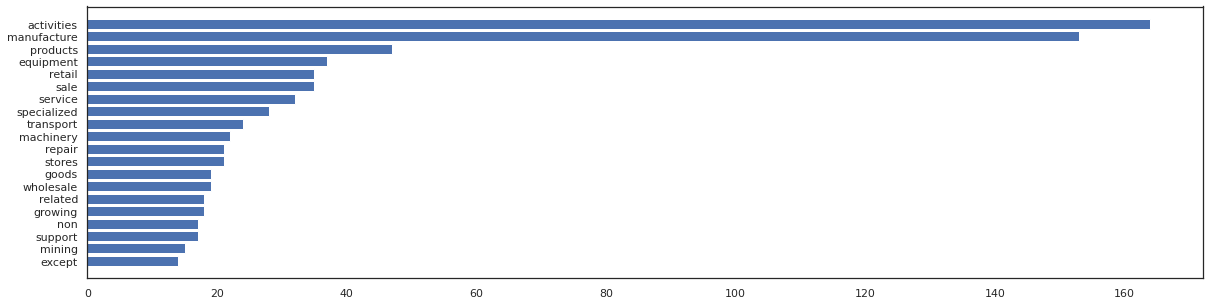

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist

all_words = ' '.join([text for text in df['NIC Name_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
words_df = words_df.nlargest(columns="count", n = 20)
words_df.sort_values('count', inplace = True)
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
dforiginal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37008 entries, 0 to 3980
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Table Name                           37008 non-null  object
 1   State Code                           37008 non-null  object
 2   District Code                        37008 non-null  object
 3   India/States                         37008 non-null  object
 4   Division                             37008 non-null  object
 5   Group                                37008 non-null  object
 6   Class                                37008 non-null  object
 7   NIC Name                             37008 non-null  object
 8   Main Workers - Total -  Persons      37008 non-null  int64 
 9   Main Workers - Total - Males         37008 non-null  int64 
 10  Main Workers - Total - Females       37008 non-null  int64 
 11  Main Workers - Rural -  Persons      37008

In bag of words we're using TFIDF to convert NIC Name column to Numbers

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
san = tfidf.fit_transform(df['NIC Name_processed']).toarray()
featureNames = tfidf.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
san

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns


Now we are importing kmeans which is unsupervised learning

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

we're using kmeans to find the no of clusters that is similar group of workers

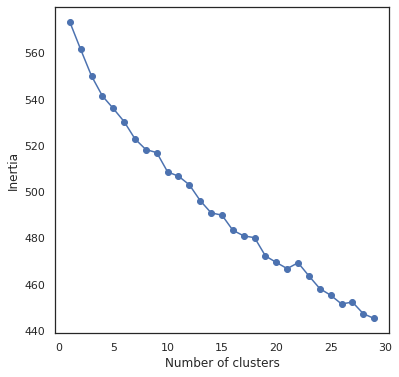

In [ ]:
inertias = []
list_k = list(range(1, 30))
for k in list_k:
  km = KMeans(n_clusters=k)
  km.fit(san)
  inertias.append(km.inertia_)
plt.figure(figsize=(6,6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters')
plt.ylabel('Inertia');
plt.show()